<div style="text-align: right"><strong>Supervised Model Comparison:</strong> <span style="color:darkred">OLS, Log Reg, KNN, Naive Bayes, Decision Tree, Random Forest</span> </div>

<a id="top"></a>

# <span style="color:darkblue">Amazon Pet Product Reviews</span>

__Author:__ Ryan Harper 

<a href='#ov'>Overview</a><br>
<a href='#exp'>Experiment</a><br>
<a href='#sec1'>1. Cleaning Data</a><br>
<a href='#sec2'>2. Exploring the Data</a><br>
<a href='#sec3'>3. Models:</a><br>
><a href='#seca'>A. LR - Ordinary Least Squares</a><br>
<a href='#secb'>B. LR - Logistic Regression</a> <a href='#secb1'> (Lasso)</a> <a href='#secb2'> (Ridge)</a><br>
<a href='#secc'>C. NN - K Nearest Neighbors</a><br>
<a href='#secd'>D. NN - Naive Bayes</a><br>
<a href='#sece'>E. NN - Decision Tree</a><br>
<a href='#secf'>F. Ensemble - Random Forest</a><br>

<a href='#sec4'>4. Model Comparison</a><br>

<a id="ov"></a>

# <span style="color:darkblue">Overview</span>  <a href='#top'>(top)</a>

__Data Source:__ <br>
> http://jmcauley.ucsd.edu/data/amazon/

__Thinkful Goal:__<br>
> "Use one of the following datasets to perform sentiment analysis on the given Amazon reviews. Pick one of the "small" datasets that is a reasonable size for your computer. The goal is to create a model to algorithmically predict if a review is positive or negative just based on its text. Try to see how these reviews compare across categories. Does a review classification model for one category work for another?"

__Variables (health indicators):__
>__year:__ _Year the baby was born_<br>
__gender:__ _sex (1 = male; 0 = female)_ <br>
__name:__ _name of the baby_<br>
__year_count:__ _number of babies with same name for that year for a gender_

<a id="exp"></a>

# <span style="color:darkblue">Experiment</span> <a href='#top'>(top)</a>

__Observations:__
><li> Logistic Regression and Naive Bayes do not outperform other models. Perhaps feature design needs to changed to better fit these models.<li>K Nearest Neighbors and Random Forest tend to out perform the other models but the variance between each sampling is pretty high <li>Lasso and Ridge parameter reductions don't work when applied to the test sample. Perhaps it's only useful for changing parameters?

__Hypothesis:__ 
> Logistic Regression and Naive Bayes will be able to predict gender with the highest prediction percentage irregardless of feature choice.

__Thoughts:__
><li>To better understand the scoring of each model, I need to run each model multiple times on difference samples to get a better feel for the range of prediction scores.<li>I probably need to be consistent with the features that I use (i.e. continuous, ranked, or discrete)

__Method:__
> Using multiple different models. The aim of this project is to explore how different models can handle the data (target and features) and to see what information can be gained from using multiple different models. Ultimately, the goal is to determine which models are appropriate for a binary (discrete) target with features that are both qualitative (discrete) and quantitative (ranked/continuous).

<a id="sec1"></a>

# <span style="color:darkblue">Cleaning the Data</span>  <a href='#top'>(top)</a>

In [1]:
# import matplotlib and numpy together
%pylab

# Restricts popup window (change to '%matplotlib qt') for popup
%matplotlib inline 

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
# iPython features
import time
from pprint import pprint

# Data processing
import pandas as pd
import plotly as plo
import seaborn as sns
from collections import Counter
from functools import reduce

# NLP
from nltk.corpus import stopwords as sw
from nltk.util import ngrams
import nltk
import re
from nltk.tokenize import RegexpTokenizer

# Preparing Models
from sklearn.model_selection import train_test_split

# Models
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.naive_bayes import BernoulliNB

# Ensemble
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

#Visualization
from IPython.display import Image
import pydotplus
import graphviz

In [3]:
# Import data
petreview = pd.read_json('../data/unit3-6/reviews_Pet_Supplies_5.json',lines=True)
petreview = petreview[['reviewText','overall']]
petreview['sentiment'] = petreview.overall.apply(lambda val: 1 if val > 3 else 0)

In [4]:
petreview.head()

,reviewText,overall,sentiment
0,I purchased the Trilogy with hoping my two cat...,3,0
1,There are usually one or more of my cats watch...,5,1
2,I bought the triliogy and have tested out all ...,4,1
3,My female kitty could care less about these vi...,4,1
4,"If I had gotten just volume two, I would have ...",3,0


In [5]:
# Confirmation that there are no more null values
petreview.isnull().values.any()

False

<a id="sec2"></a>

# <span style="color:darkblue">Exploring the Data</span>  <a href='#top'>(top)</a>

In [6]:
petreview['length'] = petreview['reviewText'].apply(len)

In [7]:
stop_words = set(sw.words('english'))
# stop_words.update([')','.',',','!'])

tokenizer = RegexpTokenizer(r'\w+')

In [8]:
%%time

pos = petreview['reviewText'].loc[petreview['sentiment'] == 1]
neg = petreview['reviewText'].loc[petreview['sentiment'] == 0]

print('Neg Counting...')
negset = Counter(np.concatenate(np.array(neg.str.lower().apply(tokenizer.tokenize))))
print('Neg Len: {}\n'.format(len(negset)))
print('Pos Counting...')
posset = Counter(np.concatenate(np.array(pos.str.lower().apply(tokenizer.tokenize))))
print('Post Len: {}\n'.format(len(posset)))

Neg Counting...
Neg Len: 35744

Pos Counting...
Post Len: 61842

CPU times: user 21.2 s, sys: 9.06 s, total: 30.3 s
Wall time: 32.3 s


In [9]:
print('Removing stop_words....')
for sw in stop_words:
    if sw in negset:
        print('{} removed'.format(sw), end='--')
        del negset[sw]
    if sw in posset:
        print('{} removed'.format(sw), end='--')
        del posset[sw]
negset = negset.most_common(50) 
posset = posset.most_common(50)     
 

Removing stop_words....
than is in negset	than is in posset	him is in negset	him is in posset	herself is in negset	herself is in posset	how is in negset	how is in posset	our is in negset	our is in posset	ours is in negset	ours is in posset	the is in negset	the is in posset	m is in negset	m is in posset	which is in negset	which is in posset	above is in negset	above is in posset	about is in negset	about is in posset	that is in negset	that is in posset	to is in negset	to is in posset	was is in negset	was is in posset	d is in negset	d is in posset	aren is in negset	aren is in posset	up is in negset	up is in posset	again is in negset	again is in posset	once is in negset	once is in posset	wouldn is in negset	wouldn is in posset	between is in negset	between is in posset	their is in negset	their is in posset	against is in negset	against is in posset	nor is in negset	nor is in posset	needn is in negset	needn is in posset	yours is in negset	yours is in posset	ve is in negset	ve is in posset	are 

In [10]:
# # create set of stop words from nltk corpus
# def bigram(value):
#     tokens = nltk.word_tokenize(value)
#     bigrm = list(nltk.bigrams(tokens))
#     bigramlist = []
    
#     for bigram in bigrm:
#         bigramlist.append(' '.join(bigram))
        
#     return bigramlist

In [11]:
def wcount(val):
    if w in val.lower():
        return 0
    else:
        return 1

In [12]:
for w, c in negset:
    print('neg: {}'.format(w),end="\t")
    petreview[w] = np.where(petreview['reviewText'].str.contains(w), 1, 0)
    
for w, c in posset:
    print('pos: {}'.format(w),end="\t")
    petreview[w] = np.where(petreview['reviewText'].str.contains(w), 1, 0)
    

neg: dog	neg: one	neg: would	neg: like	neg: cat	neg: get	neg: dogs	neg: cats	neg: food	neg: product	neg: use	neg: toy	neg: good	neg: really	neg: much	neg: well	neg: time	neg: even	neg: litter	neg: small	neg: work	neg: two	neg: also	neg: little	neg: 2	neg: back	neg: still	neg: water	neg: first	neg: bought	neg: better	neg: made	neg: got	neg: 34	neg: think	neg: box	neg: great	neg: could	neg: put	neg: used	neg: eat	neg: 3	neg: treats	neg: around	neg: buy	neg: way	neg: however	neg: since	neg: try	neg: day	pos: dog	pos: one	pos: like	pos: cat	pos: food	pos: dogs	pos: great	pos: cats	pos: get	pos: would	pos: love	pos: use	pos: well	pos: good	pos: product	pos: little	pos: time	pos: really	pos: much	pos: also	pos: toy	pos: loves	pos: two	pos: water	pos: litter	pos: easy	pos: small	pos: even	pos: still	pos: treats	pos: 2	pos: put	pos: around	pos: 34	pos: bought	pos: used	pos: size	pos: keep	pos: got	pos: works	pos: first	pos: long	pos: old	pos: box	pos: recommend	pos: price	pos: made	pos: day	po

In [13]:
petreview.head()

,reviewText,overall,sentiment,length,dog,one,would,like,cat,get,...,loves,easy,size,keep,works,long,old,recommend,price,go
0,I purchased the Trilogy with hoping my two cat...,3,0,590,0,1,1,1,1,0,...,0,0,0,0,0,0,1,0,0,1
1,There are usually one or more of my cats watch...,5,1,217,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
2,I bought the triliogy and have tested out all ...,4,1,412,0,1,1,0,1,1,...,0,0,0,0,0,0,0,1,0,0
3,My female kitty could care less about these vi...,4,1,288,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,"If I had gotten just volume two, I would have ...",3,0,888,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1


<a id="sec3"></a>

# <span style="color:darkblue">Models:</span>  <a href='#top'>(top)</a>

In [14]:
# feature data for models
features = petreview.copy()
features.head()
features = features.sample(frac=1.0)
del features['reviewText']
del features['overall']

In [16]:
features.head()

,sentiment,length,dog,one,would,like,cat,get,dogs,cats,...,loves,easy,size,keep,works,long,old,recommend,price,go
150428,1,203,1,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
37802,1,320,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
70788,1,12,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
142424,1,401,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
114855,1,274,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
y = features['sentiment'].values.reshape(-1, 1).ravel()
X = features.loc[:, ~features.columns.isin(['sentiment'])]

print(np.shape(y))
print(np.shape(X))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)  

(157836,)
(157836, 62)


<a id="seca"></a>

### <span style="color:darkblue">A. LR - Ordinary Least Squares</span>  <a href='#top'>(top)</a>

> Target is binary so this model may not be appropriate <br>Many features are binary so model may not be appropriate <br>Predicted values are not binary and need to be rounded up/down

In [21]:
%%capture timeA --no-stderr
%%time

# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(X_train, y_train)

In [22]:
regr.coef_

array([-4.32167827e-05, -2.29211954e-02, -9.64922958e-03, -1.15405687e-01,
       -5.16663472e-03, -6.86209426e-04,  7.93678400e-03,  2.51190367e-02,
       -2.99093623e-03,  2.33702081e-02, -2.78064523e-02, -2.53403500e-03,
       -4.36569973e-02,  7.73975635e-03, -2.86051224e-03,  1.59721624e-03,
        5.95680639e-02,  2.35253842e-02, -2.68846937e-02, -6.15671266e-03,
       -2.29762191e-02, -6.54988332e-02,  1.33088399e-02,  3.37626332e-02,
        4.92199476e-02, -1.08274659e-02, -4.39870290e-02,  2.16871247e-04,
        2.17342124e-02, -1.89801146e-02, -1.69884420e-02, -4.42274535e-02,
       -3.71932625e-02, -1.88759967e-02,  2.79797086e-02, -3.53273523e-02,
        4.75291759e-03,  6.97262804e-02, -5.01695683e-02,  1.45167730e-02,
        1.02358506e-02,  3.68914855e-02, -2.70446978e-02, -8.06895929e-03,
        3.22751534e-02, -7.29100033e-03, -1.92114271e-02, -7.78901799e-02,
        6.31745503e-03, -4.70401391e-02,  5.16080484e-03,  1.16194092e-01,
        4.17434230e-02,  

In [23]:
# Display the attributes
print('Coefficients: \n')
pprint(list(zip(X.columns,regr.coef_)))
print('\nIntercept: \n', regr.intercept_)
coef = list(zip(X.columns,regr.coef_))

Coefficients: 

[('length', -4.32167826701919e-05),
 ('dog', -0.022921195426661208),
 ('one', -0.009649229584585091),
 ('would', -0.11540568748550245),
 ('like', -0.005166634717144014),
 ('cat', -0.0006862094263055674),
 ('get', 0.007936783997645157),
 ('dogs', 0.025119036746814913),
 ('cats', -0.002990936227218771),
 ('food', 0.023370208146385584),
 ('product', -0.02780645231906871),
 ('use', -0.0025340349998360656),
 ('toy', -0.04365699733856092),
 ('good', 0.007739756352679934),
 ('really', -0.0028605122378409925),
 ('much', 0.0015972162369061998),
 ('well', 0.0595680639362997),
 ('time', 0.02352538420058848),
 ('even', -0.026884693712628062),
 ('litter', -0.006156712655766488),
 ('small', -0.02297621906563081),
 ('work', -0.06549883317756525),
 ('two', 0.013308839911660946),
 ('also', 0.03376263320410644),
 ('little', 0.049219947608621764),
 ('2', -0.010827465915027708),
 ('back', -0.04398702895801267),
 ('still', 0.0002168712472109379),
 ('water', 0.02173421237803761),
 ('first', 

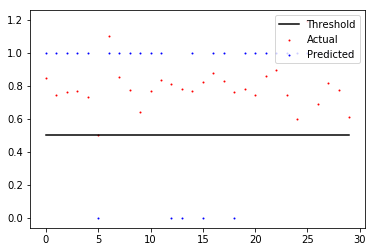

In [24]:
# Visualization of gender approximation
x = list(range(len(y_test[0:30])))
y =[0.5]*len(y_test[0:30])

predY = regr.predict(X_test)
plt.scatter(range(len(y_test[0:30])),predY[0:30],c='red',s=1)
plt.scatter(range(len(y_test[0:30])),y_test[0:30],c='blue',s=1)
plt.plot(x,y,c='black')
plt.legend(['Threshold','Actual','Predicted'],loc='upper right')
plt.show()

In [25]:
# score is low because of approximate values with lin regression - values need to be rounded
regr.score(X_test,y_test)

0.09479671479057372

In [33]:
# create vectorizer function for numpy
vfunc =  np.vectorize(lambda val: int(round(abs(val))))

# create final copy
final = X_test.copy()
final['sentiment'] = y_test
final['sentiment_guess'] = vfunc(regr.predict(X_test).ravel())
scoreA = (final['sentiment'] == final['sentiment_guess']).sum()/len(final['sentiment_guess'])
print(scoreA)

0.7897026524750802


<a id="secb"></a>

### <span style="color:darkblue">B. LR - Logistic Regression</span>  <a href='#top'>(top)</a>

> Target is binary so logistic regression will operate on probabilities

In [34]:
%%capture timeB --no-stderr
%%time

# Instantiate our model.
lregr = linear_model.LogisticRegression()

# Fit our model to our data.
lregr.fit(X_train, y_train)

In [35]:
lregr.coef_

array([[-3.12620567e-04, -1.47337047e-01, -5.71289278e-02,
        -6.89876248e-01, -3.46777406e-02, -2.71950199e-03,
         5.40041161e-02,  1.59657823e-01, -2.15112469e-02,
         1.65252553e-01, -1.74336424e-01, -1.48281069e-02,
        -2.92305908e-01,  5.17564204e-02, -1.83281638e-02,
         3.95613394e-03,  4.05575881e-01,  1.62276469e-01,
        -1.65845642e-01, -3.04514942e-02, -1.51871209e-01,
        -3.83733255e-01,  8.48306893e-02,  2.35937788e-01,
         3.41347971e-01, -6.57854155e-02, -2.67057440e-01,
        -1.49111583e-03,  1.49780406e-01, -1.19672408e-01,
        -1.05436887e-01, -2.63415477e-01, -2.32712071e-01,
        -1.27015867e-01,  1.74796831e-01, -2.12609042e-01,
         2.43102358e-02,  5.55271696e-01, -2.92613969e-01,
         9.83285970e-02,  5.97253536e-02,  2.36748504e-01,
        -1.71840464e-01, -4.47426689e-02,  2.14524691e-01,
        -5.31398724e-02, -1.23224474e-01, -4.30415555e-01,
         4.23720530e-02, -2.84313297e-01,  3.25282412e-0

In [36]:
# Display the attributes
print('Coefficients: \n')
pprint(list(zip(X.columns,lregr.coef_[0])))
print('\nIntercept: \n', lregr.intercept_)
coef = list(zip(X.columns,lregr.coef_[0]))

Coefficients: 

[('length', -0.00031262056707314614),
 ('dog', -0.14733704675395728),
 ('one', -0.057128927784591346),
 ('would', -0.689876248172483),
 ('like', -0.034677740607905794),
 ('cat', -0.002719501992675765),
 ('get', 0.054004116145934984),
 ('dogs', 0.15965782330491887),
 ('cats', -0.021511246901351797),
 ('food', 0.1652525527834391),
 ('product', -0.1743364238278416),
 ('use', -0.014828106929228053),
 ('toy', -0.29230590790322064),
 ('good', 0.051756420446521734),
 ('really', -0.01832816375526013),
 ('much', 0.003956133940798556),
 ('well', 0.4055758814899113),
 ('time', 0.16227646901594578),
 ('even', -0.16584564235031965),
 ('litter', -0.03045149418590857),
 ('small', -0.15187120880160748),
 ('work', -0.3837332547978804),
 ('two', 0.08483068930548854),
 ('also', 0.23593778763603407),
 ('little', 0.34134797113561643),
 ('2', -0.06578541551821582),
 ('back', -0.2670574397996457),
 ('still', -0.001491115827086328),
 ('water', 0.14978040624380753),
 ('first', -0.11967240760361

In [37]:
print(lregr.score(X_test,y_test))
scoreB = lregr.score(X_test,y_test)

0.7904629160331137


<a id="secb1"></a>

#### <span style="color:darkred">B1. Lasso</span>  <a href='#top'>(top)</a>

In [39]:
lamvalues = [.1,.25,.5,.75,1,3,5,10]

for lam in lamvalues:
    # Instantiate our model.
    lasso = linear_model.Lasso(alpha=lam,fit_intercept=False)
    
    # Fit our model to our data.
    lasso.fit(X_train, y_train)
    
    print('\u03bb={} \tLasso Score: {}'.format(lam, lasso.score(X_test,y_test)))

λ=0.1 	Lasso Score: -1.4760678106735128
λ=0.25 	Lasso Score: -2.0674128206260045
λ=0.5 	Lasso Score: -2.0675675510775564
λ=0.75 	Lasso Score: -2.0677237054690156
λ=1 	Lasso Score: -2.0678812838003826
λ=3 	Lasso Score: -2.0691931722879846
λ=5 	Lasso Score: -2.0705961929296683
λ=10 	Lasso Score: -2.0745024477079803


<a id="secb2"></a>

#### <span style="color:darkred">B2. Ridge</span>  <a href='#top'>(top)</a>

In [40]:
lamvalues = [.1,.5,.75,1,3,5,10]

for lam in lamvalues:
    # Instantiate our model.
    ridg = linear_model.Ridge(alpha=lam,fit_intercept=False)
    
    # Fit our model to our data.
    ridg.fit(X_train, y_train)
    
    print('\u03bb={} \tRidge Score: {}'.format(lam, ridg.score(X_test,y_test)))

λ=0.1 	Ridge Score: -0.5488466355532271
λ=0.5 	Ridge Score: -0.5488468614763504
λ=0.75 	Ridge Score: -0.5488470028823575
λ=1 	Ridge Score: -0.5488471444452936
λ=3 	Ridge Score: -0.5488482825947014
λ=5 	Ridge Score: -0.5488494307705629
λ=10 	Ridge Score: -0.5488523449768097


_Lasso and Ridge are not good predictors so should I just be using them for parameter manipulation?_

<a id="secc"></a>

### <span style="color:darkblue">C. K Nearest Neighbors</span>  <a href='#top'>(top)</a>

> Can handle discrete values for target <br>Quantitative values are limited (not continuous) and might be problematic for nearest neighbors

In [41]:
%%capture timeC --no-stderr
%%time
neighbors = KNeighborsClassifier(n_neighbors=5)
neighbors.fit(X_train, y_train.ravel())

In [42]:
print(neighbors.score(X_test,y_test))
scoreC = neighbors.score(X_test,y_test)

0.7439178915357324


<a id="secc"></a>

### <span style="color:darkblue">D. Naive Bayes - Bernoulli</span>  <a href='#top'>(top)</a>

> Should be best for boolean classification but has lowest prediction score

In [43]:
%%capture timeD --no-stderr
%%time
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

In [44]:
print(bnb.score(X_test,y_test))
scoreD = bnb.score(X_test,y_test)

0.7783831728332489


<a id="sece"></a>

### <span style="color:darkblue">E. Decision Tree</span>  <a href='#top'>(top)</a>

> Visualizes most important features by hierarchy <br>Longer processing time

In [45]:
%%capture timeE --no-stderr
%%time

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=3)

decision_tree.fit(X_train, y_train)

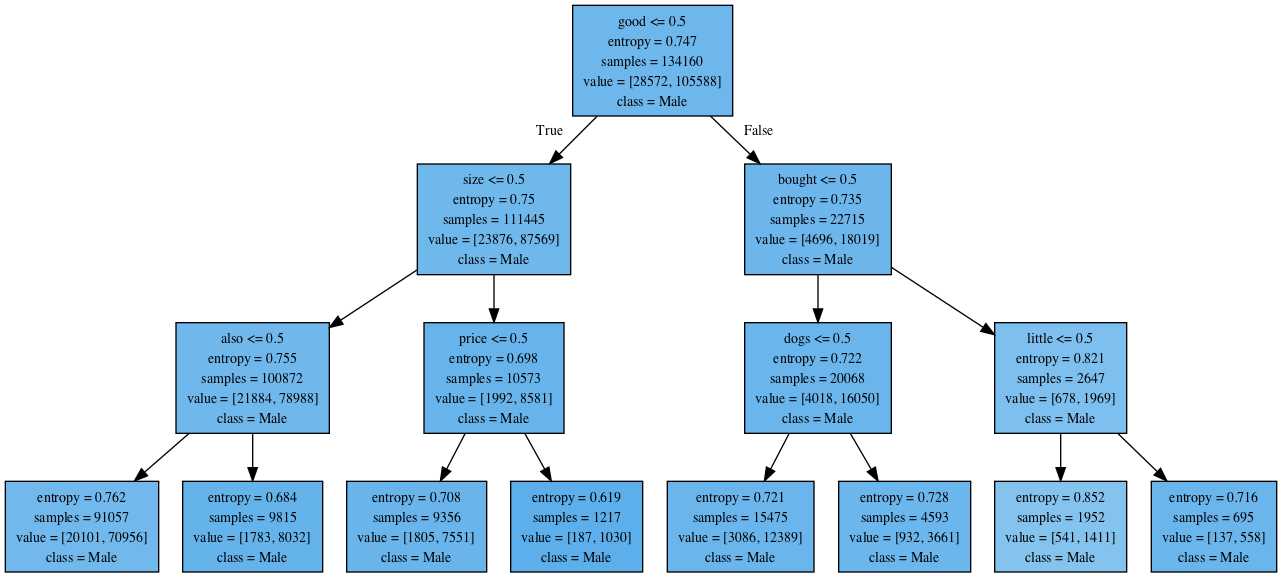

In [46]:
# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=['Female', 'Male'],
    filled=True
)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [47]:
scoreE=decision_tree.score(X_test,y_test)
decision_tree.score(X_test,y_test)

0.7881398884946782

_Good visualization of important features and presentation of entropy weighting_

<a id="secf"></a>

### <span style="color:darkblue">F. Random Forest</span>  <a href='#top'>(top)</a>

> Runs decision tree multiple times for best output <br>Longest processing time

In [48]:
%%capture timeF --no-stderr
%%time

rfc = ensemble.RandomForestClassifier(n_estimators=20)
rfc.fit(X_train,y_train.ravel())

In [49]:
cvs = cross_val_score(rfc, X_test, y_test.ravel(), cv=5)
print(cvs)
scoreF = cvs.sum()/len(cvs)

[0.77280405 0.77465681 0.78099261 0.77106653 0.77740232]


In [50]:
rfc.score(X_train,y_train)

0.9947823494335122

In [51]:
rfc.feature_importances_
importance = list(zip(X.columns,rfc.feature_importances_))

<a id="sec4"></a>

# <span style="color:darkblue">4. Model Comparison</span>  <a href='#top'>(top)</a>

In [52]:
print('OLS Coefficients:')
pprint(coef)
print('\nDecision Tree Importance:')
pprint(importance)

OLS Coefficients:
[('length', -0.00031262056707314614),
 ('dog', -0.14733704675395728),
 ('one', -0.057128927784591346),
 ('would', -0.689876248172483),
 ('like', -0.034677740607905794),
 ('cat', -0.002719501992675765),
 ('get', 0.054004116145934984),
 ('dogs', 0.15965782330491887),
 ('cats', -0.021511246901351797),
 ('food', 0.1652525527834391),
 ('product', -0.1743364238278416),
 ('use', -0.014828106929228053),
 ('toy', -0.29230590790322064),
 ('good', 0.051756420446521734),
 ('really', -0.01832816375526013),
 ('much', 0.003956133940798556),
 ('well', 0.4055758814899113),
 ('time', 0.16227646901594578),
 ('even', -0.16584564235031965),
 ('litter', -0.03045149418590857),
 ('small', -0.15187120880160748),
 ('work', -0.3837332547978804),
 ('two', 0.08483068930548854),
 ('also', 0.23593778763603407),
 ('little', 0.34134797113561643),
 ('2', -0.06578541551821582),
 ('back', -0.2670574397996457),
 ('still', -0.001491115827086328),
 ('water', 0.14978040624380753),
 ('first', -0.119672407603

In [53]:
models = ['Ordinary Least Squares','Logistic Regression','K Nearest Neigbbors','Naive Bayes Bernoulli','Decision Tree','Random Forest']
times = [timeA,timeB,timeC,timeD,timeE,timeF]
timesfinal = []
for time in times:
    timesfinal.append((((time.stdout.splitlines())[0].split(','))[0].split('user '))[1])
score = [str(scoreA)[0:7]+('*'),scoreB,scoreC,scoreD,scoreE,scoreF]

dfModels = pd.DataFrame(index=models)
dfModels['cpu time'] = timesfinal
dfModels['score'] = score
dfModels

,cpu time,score
Ordinary Least Squares,490 ms,0.78970*
Logistic Regression,602 ms,0.790463
K Nearest Neigbbors,753 ms,0.743918
Naive Bayes Bernoulli,139 ms,0.778383
Decision Tree,25.8 ms,0.78814
Random Forest,3.73 s,0.775384
